# Image Classifier Project Tutorial

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # USAR CPU

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [3]:
# Paso 1: Cargar CIFAR-10 y filtrar aviones (label 0) y pájaros (label 2)
(X_train_full, y_train_full), (X_test_full, y_test_full) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
# Aplanamos las etiquetas para trabajar fácilmente
y_train_full = y_train_full.flatten()
y_test_full = y_test_full.flatten()

In [5]:
# Filtramos solo aviones (0) y pájaros (2)
train_filter = np.where((y_train_full == 0) | (y_train_full == 2))
test_filter = np.where((y_test_full == 0) | (y_test_full == 2))

In [6]:
X_train, y_train = X_train_full[train_filter], y_train_full[train_filter]
X_test, y_test = X_test_full[test_filter], y_test_full[test_filter]

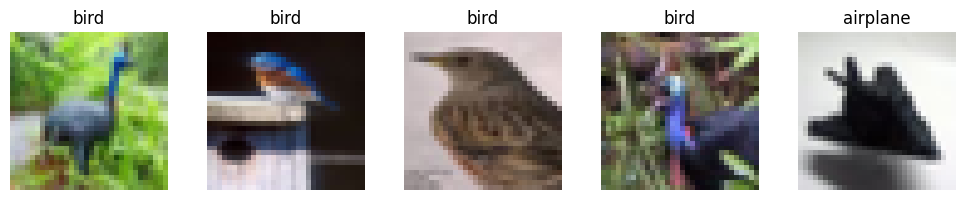

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
# Buscar índices de aviones (0) y pájaros (2)
indices = np.where((y_train == 0) | (y_train == 2))[0]

# Mostrar las primeras 5 imágenes de aviones/pájaros
plt.figure(figsize=(10, 2))
for i, idx in enumerate(indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[idx])
    label = class_names[y_train[idx]]
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [8]:
# Convertimos a etiquetas binarias: pájaro = 0, avión = 1
y_train = (y_train == 0).astype(np.uint8) # true en 1 (avión) , false en 0 (pájaro).
y_test = (y_test == 0).astype(np.uint8)

In [9]:
type(X_train)

numpy.ndarray

In [10]:
len(X_train)

10000

In [11]:
X_train[0].shape

(32, 32, 3)

In [12]:
y_train

array([0, 0, 0, ..., 1, 1, 0], dtype=uint8)

In [13]:
y_test

array([1, 1, 1, ..., 1, 0, 1], dtype=uint8)

In [14]:
# Normalizamos las imágenes [0,1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

X_train shape: (10000, 32, 32, 3), y_train shape: (10000,)


In [ ]:
model = Sequential([

    # Capa 1: Convolucional
    Conv2D(
        filters=32,               # 🧩 Número de filtros
        kernel_size=(3, 3),       # 📏 Tamaño del filtro (kernel)
        activation='relu',       # ⚡ Función de activación
        input_shape=(32, 32, 3)   # 📷 Tamaño de la imagen de entrada (alto, ancho, canales)
    ),

    # Capa 2: MaxPooling
    MaxPooling2D(
        pool_size=(2, 2)          # 🌀 Tamaño de la ventana de pooling (reducción de tamaño)
    ),

    # Capa 3: Convolucional
    Conv2D(
        filters=64,               # 🧩 Más filtros para capturar más patrones complejos
        kernel_size=(3, 3),       # 📏 Mismo tamaño de kernel
        activation='relu'        # ⚡ Activación ReLU
    ),

    # Capa 4: MaxPooling
    MaxPooling2D(
        pool_size=(2, 2)          # 🌀 Mismo tamaño de pooling
    ),

    # Capa 5: Aplanar los mapas de activación
    Flatten(),                   # 🔁 Convierte la salida 2D a un vector 1D

    # Capa 6: Densa (oculta)
    Dense(
        units=64,                # 🔢 Número de neuronas
        activation='relu'        # ⚡ Activación ReLU
    ),

    # Capa 7: Densa (salida)
    Dense(
        units=1,                 # 🔘 Clasificación binaria (0 o 1)
        activation='sigmoid'     # ✅ Activación Sigmoide para salida entre 0 y 1
    )
])


model.compile(optimizer='adam',                            # Optimizador: Adam (Adaptativo)
              loss='binary_crossentropy',                  # Pérdida: Entropía cruzada (clasificación binaria)
              metrics=[tf.keras.metrics.AUC(name='auc')])  # Métrica: AUC (Área bajo la curva)

model.summary()

/workspaces/efrainnalmeida-image-classifier-project-tutorial/env1/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-20 02:58:31.397980: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 166,977 (652.25 KB)

 Trainable params: 166,977 (652.25 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
len(X_train)

10000

In [18]:
len(X_test)

2000

In [ ]:
history = model.fit(X_train, y_train,                   # Datos de entrenamiento (imágenes y etiquetas)
                    epochs=20,                          # Número de épocas (repeticiones completas)
                    batch_size=64,                      # Tamaño de lote (número de muestras por lote)
                    validation_data=(X_test, y_test))   # Datos de validación (imágenes y etiquetas)

Epoch 1/20


2025-05-20 03:00:25.890921: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


  4/157 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - auc: 0.5979 - loss: 0.6877

2025-05-20 03:00:27.157952: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19663488 exceeds 10% of free system memory.
2025-05-20 03:00:27.160104: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19663488 exceeds 10% of free system memory.
2025-05-20 03:00:27.204166: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19663488 exceeds 10% of free system memory.
2025-05-20 03:00:27.206665: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19663488 exceeds 10% of free system memory.


157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - auc: 0.8161 - loss: 0.5233 - val_auc: 0.9262 - val_loss: 0.3547
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - auc: 0.9220 - loss: 0.3583 - val_auc: 0.9395 - val_loss: 0.3651
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - auc: 0.9349 - loss: 0.3264 - val_auc: 0.9469 - val_loss: 0.2958
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - auc: 0.9512 - loss: 0.2829 - val_auc: 0.9442 - val_loss: 0.3469
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - auc: 0.9563 - loss: 0.2687 - val_auc: 0.9517 - val_loss: 0.2874
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - auc: 0.9612 - loss: 0.2519 - val_auc: 0.9537 - val_loss: 0.2896
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - auc: 0.9654 - loss: 0.2397 - val_auc: 0.9536 - val_loss: 0.3033
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - auc: 0.9719 - loss: 0.2149 - val_auc: 0.9563 - val_loss: 0.2812
Epoch 9/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - au

 1/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
AUC Score: 0.9591


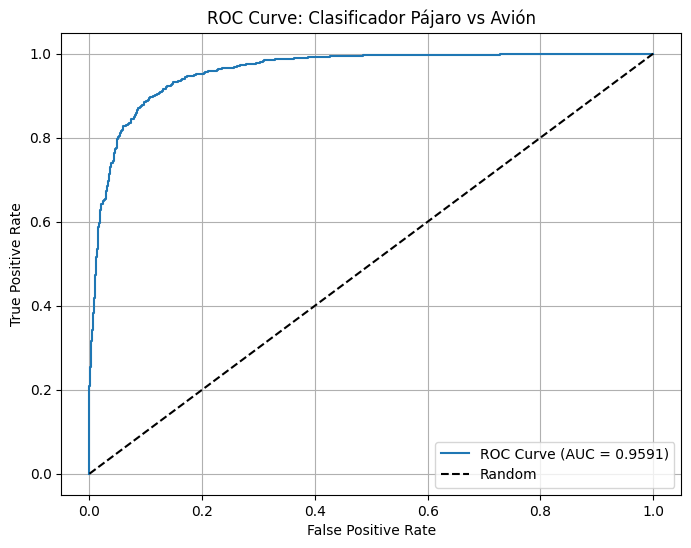

In [21]:
# Predicciones de probabilidad
y_proba = model.predict(X_test).flatten()

# Cálculo de la métrica AUC
auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC Score: {auc_score:.4f}")

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Clasificador Pájaro vs Avión')
plt.legend()
plt.grid(True)
plt.show()